In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%cd /home/jeroen/repos/traffic-scheduling/
from motion.motion import motion_synthesize

/home/jeroen/repos/traffic-scheduling


In [2]:
params = {
    'vmax': 4,
    'umax': 1,
    'dt': 0.1,
    'l': 4,
}

lane_length = params['vmax'] * params['vmax'] / params['umax'] + params['l']
print(f"for capacity 2, lane length = {lane_length}")

for capacity 2, lane length = 20.0


In [3]:
processing_time = params['vmax'] / params['l']
print(f"processing time = {processing_time}")

processing time = 1.0


In [84]:
y = [[0, 12], [3, 16], [9, 17]]

# constraint
# yf_0 + 2 * params['l'] - lane_length / params['vmax'] <= y0_2
print(y[0][1] + 2 * processing_time - lane_length / params['vmax'])

9.0


In [85]:
x = []
prev = None
for y0, yf in y:
    checkpoints = np.array([
        (y0, 0),
        (yf, lane_length),
    ])
    x.append(motion_synthesize(checkpoints, params, prev=prev))
    prev = (yf, x[-1])

Gurobi 11.0.2:Gurobi 11.0.2: optimal solution; objective 1364
39 simplex iterations
1 branching node
absmipgap=2.27374e-13, relmipgap=0
Gurobi 11.0.2:Gurobi 11.0.2: optimal solution; objective 1306
49 simplex iterations
1 branching node
Gurobi 11.0.2:Gurobi 11.0.2: optimal solution; objective 760.25
30 simplex iterations
1 branching node
absmipgap=2.27374e-13, relmipgap=0


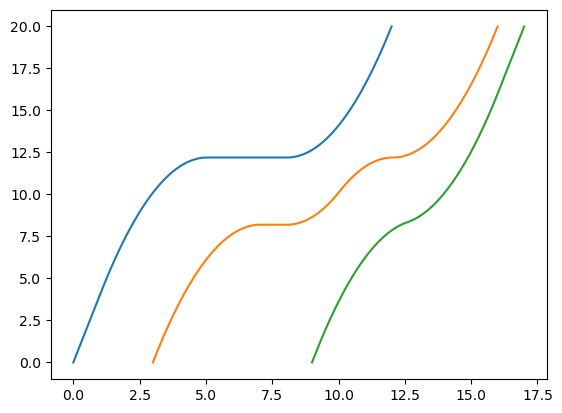

In [86]:
for traject, (y0, yf) in zip(x, y):
    t = np.arange(y0, yf + params['dt'], params['dt'])
    plt.plot(t[:len(traject)], traject)

In [7]:
from network.generate_network import generate_grid_network
from network.util import draw_network, draw_vehicles
import networkx as nx

In [8]:
G = nx.Graph()
G.add_node((0, 1), pos=(0, 10))
G.add_node((1, 1), pos=(5, 10))
G.add_node((2, 1), pos=(15, 10))
G.add_node((3, 1), pos=(20, 10))

G.add_node((1, 0), pos=(5, 8))
G.add_node((1, 2), pos=(5, 12))

G.add_node((2, 0), pos=(15, 8))
G.add_node((2, 2), pos=(15, 12))

G.add_edge((0, 1), (1, 1))
G.add_edge((1, 1), (2, 1))
G.add_edge((2, 1), (3, 1))
G.add_edge((1, 0), (1, 1))
G.add_edge((1, 2), (1, 1))
G.add_edge((2, 0), (2, 1))
G.add_edge((2, 2), (2, 1))
routes = [[(0, 1), (1, 1), (2, 1), (3, 1)]]

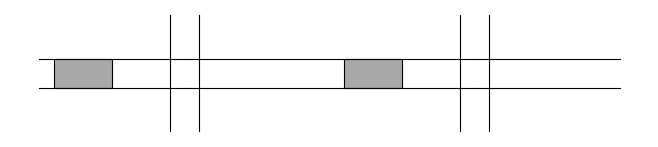

In [10]:
draw_vehicles(G, routes, { (0, 0): 3, (0, 1): 13 }, out='tandem.pdf');